```{figure} ../../figures/checked.png
---
width: 35%
align: right
```

# Radioactive decay - A simulation

<table style="width: 100%; border-collapse: collapse; border: none;">
    <tr style="background-color: var(--background-color);"> 
        <td style="text-align: left; padding: 3px; border: none; color: var(--text-color)">Author:</td>
        <td style="text-align: left; padding: 3px; border: none; color: var(--text-color)">Maarten van Woerkom</td>
    </tr>
    <tr style="background-color: var(--background-color);">
        <td style="text-align: left; padding: 3px; border: none; color: var(--text-color)">Time:</td>
        <td style="text-align: left; padding: 3px; border: none; color: var(--text-color)">one hour</td>
    </tr>
    <tr style="background-color: var(--background-color);">
        <td style="text-align: left; padding: 3px; border: none; color: var(--text-color)">Age group:</td>
        <td style="text-align: left; padding: 3px; border: none; color: var(--text-color)">Grade 11 and above</td>
    </tr>
    <tr style="background-color: var(--background-color);">
        <td style="text-align: left; padding: 3px; border: none; color: var(--text-color)">Concepts:</td>
        <td style="text-align: left; padding: 3px; border: none; color: var(--text-color)">radiation, radioactive decay, half-life
s</td>
    </tr>
</table><br>

## Introduction
Radioactive decay is a statistical process. As the process of radioactive decay is difficult to imagine for students, this demonstration helps them to visualize it.

You have at your disposal a large number of cubes, cubes, with a rib of about 1.5 cm. Assume, for example, 300 cubes. Each cube is painted blue on one side and red on two sides. The other three sides are blank. The statistical aspect of radioactive decay is simulated by throwing the coloured cubes. If you throw the cubes on the table like dice, about 1/6 part will end up with the blue side up, 2/6 part red, 3/6 part white.

```{figure} demo97_figure1.jpg
---
width: 100%
align: center
---
*(a)* All cubes after the first roll. *(b)* The cubes whose blue side ended up on top after this first roll are set aside.
```

Remove the cubes with the red top and throw the other cubes back on the table. Again take away the cubes with the red top and throw the other cubes... and so on until hardly any cubes are left.

You could also have removed the blocks with a blue top. Then it will take more throws before all cubes are removed. 

## Equipment
For a good statistical approximation, an initial number of three hundred cubes is sufficient.

## Preparation
Make the three hundred cubes by starting from a lath that has a square cross-section. You paint one side blue, two sides red. After sawing, three sides of the cubes are blank.

## Procedure
* Count the initial number of cubes. You denote that number by $N(0)$. The letter $N$ stands for the Number of cubes remaining. The number 0 stands for thrown 0 times.
* Throw all cubes for the first time. Remove all the cubes that were placed with the red side up. The number of cubes remaining is called $N(1)$.
This is the number of cubes remaining after one throw.
Throw the remaining cubes for the second time. Remove the red cubes again. Now the number of $N(2)$ remains.
Do about 10 throws like this unless you run out of cubes before then.
* Draw the graph of the number of remaining cubes plotted against the number of throws, i.e. $N(n)$ against $n$.
* Devise a formula showing the relationship between $N(n)$ and the initial number of $N(0)$.
* Draw the graph associated with this formula.
* Comment on the degree of agreement between the graph of counts and the graph of the formula.

* Predict the graph if you remove the cubes with blue top instead of those with red top.
* Do the counts and check how well the graph fits the theoretical graph.

Show a graph of the number of radioactive nuclei as a function of time. (Or of the radiation activity of a radioactive substance.) To that graph belongs the formula:
$N(t)=N(0) (1/2)^{(t/τ)}$
or rather:
*The shape of the graph is very similar to that of the graphs of the counts of the remaining cubes.*

## Physics background
* For *cubes*, the number of cubes remaining depends on the number you start with as well as the probability that the red colour comes up;
* For *atomic nuclei*, the number of times that remain depends on the number you start with as well as on the probability of a nucleus decaying. 

## Follow-up
In radioactive processes, a radioactive substance **A** decays into substance **B**. This was simulated by throwing the cubes (substance **A**). The red cubes (substance **B**) were taken away.
It is quite possible that substance **B** is itself radioactive and decays to substance **C**. So **A** → **B** → **C**. So, on the one hand, the number of nuclei **B** increases due to decay of **A** and, on the other hand, the number of nuclei **B** decreases due to decay to **C**. If substance **C** is stable, the amount of **C** will only increase.

You can also simulate this situation by performing two kinds of throws in parallel. The first kind is the series described above. The second proceeds as follows.
* Always collect the removed red cubes (substance **B**), but also throw them. 
* Take them away when they turn blue (substance **C**). 
* The number of red cubes taken away grows by decay of substance **A**, but  decreases because they turn blue when thrown (substance **C**).
* The number of blue cubes will only increase.

```{tip}
The demonstration can also be done with dices. There are dices with less than 6 sides.

Ìt is fairly easy to make a computer simulations of this 'decay process' using for instance excel. We provide a Python simulation below. You can run (and change the code) yourselves by clicking on the rocket at the top of your screen. 
```



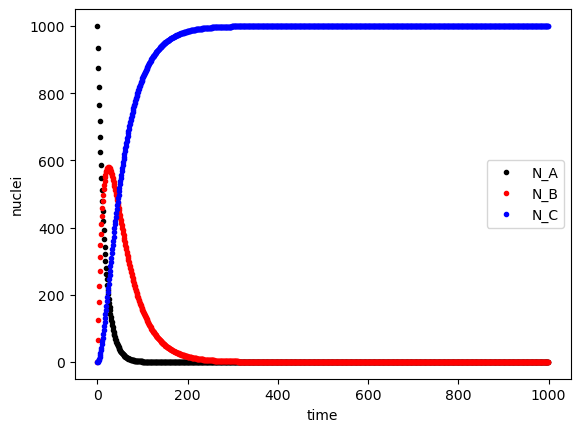

In [1]:
# loading required libraries
import numpy as np
import matplotlib.pyplot as plt

# setting initial conditions
t_run = 1000 #s
dt = 1 #s

# half-life nuclei A
tau_A = 10 #s

# half-life nuclei B
tau_B = 30 #s

# Number of nucleus A
N_A_0 = 15000


# No need to change this code
N_total = int(t_run/dt)
N_A = np.zeros(N_total)
N_A[0] = N_A_0
N_B = np.zeros(N_total)
N_C = np.zeros(N_total)

t = np.zeros(N_total)

L_A = np.log(2)/tau_A
L_B = np.log(2)/tau_B


# calculating number of nuclei left
for i in range(len(N_A)-1):
    A_A = N_A[i]*L_A*np.exp(-L_A*dt)
    N_A[i+1] = N_A[i] - A_A*dt

    A_B = N_B[i]*L_B*np.exp(-L_B*dt)
    N_B[i+1] = N_B[i] - A_B*dt + A_A*dt

    N_C[i+1] = N_C[i] + A_B*dt

    t[i+1] = t[i] + dt

# plotting the data
plt.figure()
plt.plot(t,N_A,'k.',label='N_A')
plt.plot(t,N_B,'r.',label='N_B')
plt.plot(t,N_C,'b.',label='N_C')
plt.xlabel('time')
plt.ylabel('nuclei')
plt.legend()
plt.show()

## References
```{bibliography}
:filter: docname in docnames
```